# Lab_06: Decision trees and Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
!wget https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/2d-synthetic.csv -O synthetic_dataset.csv

--2022-05-01 17:34:58--  https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/2d-synthetic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19259 (19K) [text/plain]
Saving to: ‘synthetic_dataset.csv’

synthetic_dataset.c 100%[===================>]  18,81K  --.-KB/s    in 0,001s  

2022-05-01 17:34:58 (21,8 MB/s) - ‘synthetic_dataset.csv’ saved [19259/19259]



In [2]:
from sklearn.datasets import load_wine
X_wine, y_wine = load_wine(return_X_y=True, as_frame=True)


In [3]:
X_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [4]:
y_wine # target

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

In [2]:
from sklearn.datasets import fetch_openml

X_mnist, y_mnist = fetch_openml('mnist_784', return_X_y=True)


## 2.1 Wine classification

In [6]:
X_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [7]:
print(f'label\tnumber of samples')
for label in y_wine.unique():
    print(f"{label}\t {sum(y_wine.isin([label]))}")


label	number of samples
0	 59
1	 71
2	 48


In [8]:
from sklearn.tree import DecisionTreeClassifier
# they don't want to divide between training and test, mmmmm....
decision_tree = DecisionTreeClassifier().fit(X_wine, y_wine)

[Text(0.5657894736842105, 0.9166666666666666, 'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(0.34210526315789475, 0.75, 'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(0.21052631578947367, 0.5833333333333334, 'X[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(0.10526315789473684, 0.4166666666666667, 'X[6] <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(0.05263157894736842, 0.25, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(0.15789473684210525, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3157894736842105, 0.4166666666666667, 'X[0] <= 13.515\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.2631578947368421, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.3684210526315789, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.47368421052631576, 0.5833333333333334, 'X[6] <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 61, 2]'),
 Text(0.4210

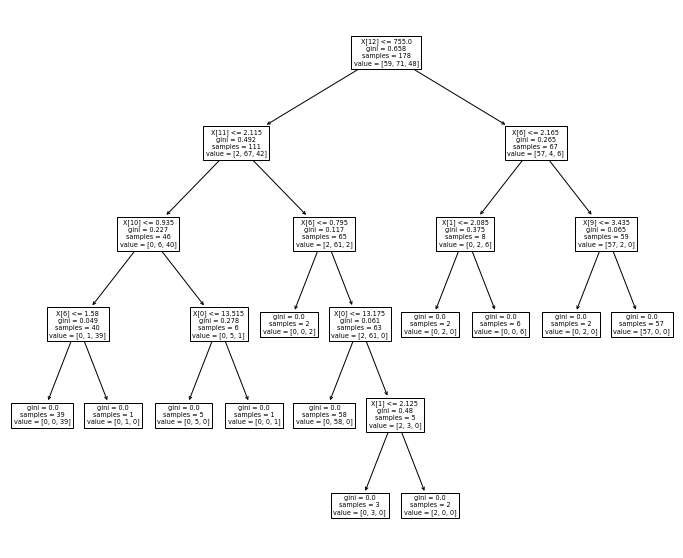

In [9]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12,10))
plot_tree(decision_tree, ax=ax)

In [10]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
preds = decision_tree.predict(X_wine)
score = accuracy_score(y_true=y_wine, y_pred=preds)
score # overfit, obv

1.0

In [11]:
# now divide in training and test
from sklearn.model_selection import train_test_split

np.random.seed(0) # set the seed

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=.2)

In [12]:
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
161,13.69,3.26,2.54,20.0,107.0,1.83,0.56,0.50,0.80,5.88,0.96,1.82,680.0
92,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0
94,11.62,1.99,2.28,18.0,98.0,3.02,2.26,0.17,1.35,3.25,1.16,2.96,345.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
24,13.50,1.81,2.61,20.0,96.0,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0
67,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510.0
117,12.42,1.61,2.19,22.5,108.0,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345.0
47,13.90,1.68,2.12,16.0,101.0,3.10,3.39,0.21,2.14,6.10,0.91,3.33,985.0


In [13]:
y_train

161    2
92     1
94     1
174    2
24     0
      ..
103    1
67     1
117    1
47     0
172    2
Name: target, Length: 142, dtype: int64

In [14]:
decision_tree = DecisionTreeClassifier().fit(X_train, y_train)
preds = decision_tree.predict(X_test)
score_labels = ['precision', 'recall', 'f1', 'support'] 
scores = precision_recall_fscore_support(y_true=y_test, y_pred=preds)
for label,score in zip(score_labels, scores):
    print(str(label).upper())
    print('class0\tclass1\tclass2')
    print(f"{score[0]:.2f}\t{score[1]}\t{score[2]}")
    print("\n")

PRECISION
class0	class1	class2
0.93	1.0	1.0


RECALL
class0	class1	class2
1.00	0.9375	1.0


F1
class0	class1	class2
0.97	0.967741935483871	1.0


SUPPORT
class0	class1	class2
14.00	16	6




In [15]:
# gridsearch
from sklearn.model_selection import ParameterGrid

parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5],
    'splitter': ['best', 'random'], 
    'min_samples_leaf': [1,3,5]
}
clfs_accuracy = []
for configuration in ParameterGrid(parameters):
    clf = DecisionTreeClassifier(**configuration).fit(X_train, y_train)
    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    clfs_accuracy.append((configuration, accuracy))

In [16]:
scores = [i[-1] for i in clfs_accuracy]
indexes = np.argwhere(np.array(scores) == max(scores)).squeeze()
for idx in indexes:
    print(clfs_accuracy[idx])

({'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'splitter': 'best'}, 0.9722222222222222)
({'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'splitter': 'random'}, 0.9722222222222222)
({'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'splitter': 'best'}, 0.9722222222222222)
({'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'splitter': 'random'}, 0.9722222222222222)
({'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'splitter': 'best'}, 0.9722222222222222)
({'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'splitter': 'best'}, 0.9722222222222222)
({'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'splitter': 'best'}, 0.9722222222222222)
({'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3, 'splitter': 'best'}, 0.9722222222222222)


In [17]:
# cross validation
from sklearn.model_selection import KFold

# Split the datasets into two:
# - X_train_valid: the dataset used for the k-fold cross-validation
# - X_test: the dataset used for the final testing (this will NOT
# be seen by the classifier during the training/validation phases)
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X_wine, y_wine, test_size=.2)
kf = KFold(5) # 5-fold cross-validation
scores = []
# X and y are the arrays to be split
for train_indices, validation_indices in kf.split(X_train_valid):
    #print(train_indices)
    X_train = X_train_valid.iloc[train_indices]
    X_valid = X_train_valid.iloc[validation_indices]
    y_train = y_train_valid.iloc[train_indices]
    y_valid = y_train_valid.iloc[validation_indices]
    clf = DecisionTreeClassifier(criterion ='gini', max_depth= None, min_samples_leaf= 1, splitter='best').fit(X_train, y_train)
    pred = clf.predict(X_valid)
    score = accuracy_score(y_true=y_valid, y_pred=pred)
    scores.append(score)
    

In [18]:
clfs_accuracy = []
clfs = []
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X_wine, y_wine, test_size=.2)
for configuration in ParameterGrid(parameters):
    kf = KFold(5) # 5-fold cross-validation
    scores = []
    counts = [] # take into account how many training points we have in each fold
    # X and y are the arrays to be split
    for train_indices, validation_indices in kf.split(X_train_valid):
        counts.append(len(train_indices))
        
        X_train = X_train_valid.iloc[train_indices]
        X_valid = X_train_valid.iloc[validation_indices]
        y_train = y_train_valid.iloc[train_indices]
        y_valid = y_train_valid.iloc[validation_indices]
        
        clf = DecisionTreeClassifier(**configuration).fit(X_train, y_train)
        clfs.append(clf)
        pred = clf.predict(X_valid)
        score = accuracy_score(y_true=y_valid, y_pred=pred)
        scores.append(score)
    # clfs_accuracy.append((configuration, np.mean(scores))) wrong mean, we need the average and taking into account the count, hence we weight accuracies
    clfs_accuracy.append((configuration, np.average(scores, weights=counts)))

In [19]:
max(scores)
np.argwhere(np.array(scores) == max(scores))

array([[0]])

In [20]:
scores = [i[1] for i in clfs_accuracy]
indexes = np.argwhere(np.array(scores) == max(scores)).reshape((1,)) # it infers the column size
for idx in indexes:
    print(idx, clfs_accuracy[idx])

35 ({'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'splitter': 'random'}, 0.9504397072087699)


In [21]:
pred = clfs[indexes[0]].predict(X_test)
final_score = accuracy_score(y_test, pred)
final_score

0.8611111111111112

[Text(0.4230769230769231, 0.875, 'X[0] <= 12.904\ngini = 0.652\nsamples = 113\nvalue = [36, 48, 29]'),
 Text(0.15384615384615385, 0.625, 'X[11] <= 1.636\ngini = 0.334\nsamples = 52\nvalue = [0, 41, 11]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 6]'),
 Text(0.23076923076923078, 0.375, 'X[11] <= 2.649\ngini = 0.194\nsamples = 46\nvalue = [0, 41, 5]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.43\nsamples = 16\nvalue = [0, 11, 5]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.6923076923076923, 0.625, 'X[6] <= 2.022\ngini = 0.551\nsamples = 61\nvalue = [36, 7, 18]'),
 Text(0.5384615384615384, 0.375, 'X[6] <= 1.247\ngini = 0.245\nsamples = 21\nvalue = [0, 3, 18]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 16]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.48\nsamples = 5\nvalue = [0, 3, 2]'),
 Text(0.8461538461538461, 0.375, 'X[12] <= 423.36\ngini = 0.18\nsamples = 40\nvalue 

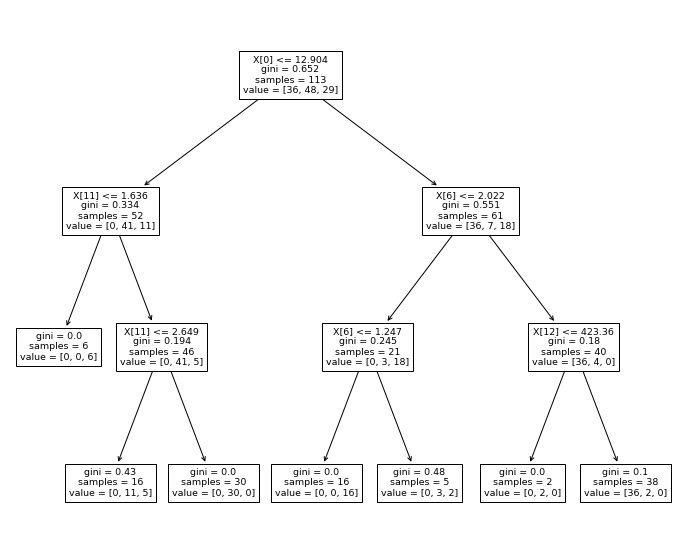

In [22]:
fig, ax = plt.subplots(figsize=(12,10))
plot_tree(clfs[indexes[0]], ax=ax)

In [23]:
#  a list of the features used at each node. A value of -2 indicates a leaf node (where no split occurs)
clfs[indexes[0]].tree_.feature 

array([ 0, 11, -2, 11, -2, -2,  6,  6, -2, -2, 12, -2, -2], dtype=int64)

In [24]:
#  a list of cardinalities of the classes for each node.
clfs[indexes[0]].tree_.value

array([[[36., 48., 29.]],

       [[ 0., 41., 11.]],

       [[ 0.,  0.,  6.]],

       [[ 0., 41.,  5.]],

       [[ 0., 11.,  5.]],

       [[ 0., 30.,  0.]],

       [[36.,  7., 18.]],

       [[ 0.,  3., 18.]],

       [[ 0.,  0., 16.]],

       [[ 0.,  3.,  2.]],

       [[36.,  4.,  0.]],

       [[ 0.,  2.,  0.]],

       [[36.,  2.,  0.]]])

In [25]:
# a list of impurity decreases for each node. 
clfs[indexes[0]].tree_.impurity

array([0.65220456, 0.33357988, 0.        , 0.19376181, 0.4296875 ,
       0.        , 0.55146466, 0.24489796, 0.        , 0.48      ,
       0.18      , 0.        , 0.09972299])

In [26]:
clfs[indexes[0]].feature_importances_ #12 features

array([0.37459803, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.39646222, 0.        , 0.        , 0.        ,
       0.        , 0.1726926 , 0.05624716])

# 2.2 Synthetic dataset

In [29]:
synth_df = pd.read_csv('synthetic_dataset.csv')
synth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      500 non-null    float64
 1   x1      500 non-null    float64
 2   label   500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [30]:
synth_df.describe()

,x0,x1,label
count,500.000000,500.000000,500.000000
mean,4.957837,5.064415,0.482000
std,2.916317,2.886626,0.500176
min,0.005344,0.033540,0.000000
25%,2.428726,2.520099,0.000000
50%,5.061141,5.121368,0.000000
75%,7.450706,7.486265,1.000000
max,9.950974,9.988671,1.000000


In [36]:
labels = synth_df.label.unique()
for label in labels:
    num = synth_df.label.isin([label]).sum()
    perc = num/len(synth_df)*100
    print(f'number of items labeled as {label}: {num}\t|\t{perc:.2f}%')
    


number of items labeled as 0: 259	|	51.80%
number of items labeled as 1: 241	|	48.20%


In [53]:
mask_0 = synth_df.label.isin([0])
synth_df.loc[mask_0].label.sum()

0

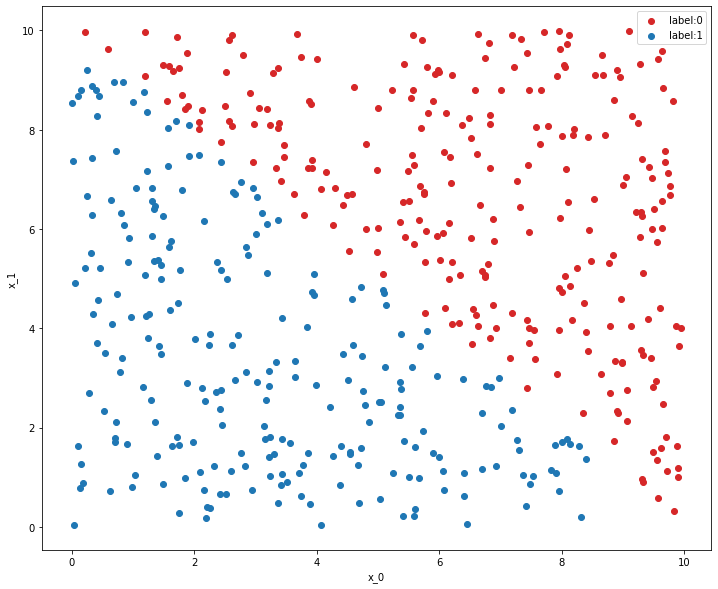

In [57]:
mask_0 = synth_df.label.isin([0])
mask_1 = synth_df.label.isin([1])

fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(synth_df.loc[mask_0].x0, synth_df.loc[mask_0].x1, c='tab:red', label='label:0')
ax.scatter(synth_df.loc[mask_1].x0, synth_df.loc[mask_1].x1, c='tab:blue', label='label:1')
ax.set_xlabel('x_0')
ax.set_ylabel('x_1')
ax.legend()

[Text(0.5984848484848485, 0.9375, 'X[0] <= 5.409\ngini = 0.499\nsamples = 500\nvalue = [259, 241]'),
 Text(0.3181818181818182, 0.8125, 'X[1] <= 6.674\ngini = 0.378\nsamples = 265\nvalue = [67, 198]'),
 Text(0.12121212121212122, 0.6875, 'X[1] <= 5.518\ngini = 0.097\nsamples = 176\nvalue = [9, 167]'),
 Text(0.06060606060606061, 0.5625, 'X[0] <= 5.076\ngini = 0.013\nsamples = 148\nvalue = [1, 147]'),
 Text(0.030303030303030304, 0.4375, 'gini = 0.0\nsamples = 136\nvalue = [0, 136]'),
 Text(0.09090909090909091, 0.4375, 'X[0] <= 5.084\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.06060606060606061, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.12121212121212122, 0.3125, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.18181818181818182, 0.5625, 'X[0] <= 3.577\ngini = 0.408\nsamples = 28\nvalue = [8, 20]'),
 Text(0.15151515151515152, 0.4375, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.21212121212121213, 0.4375, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),

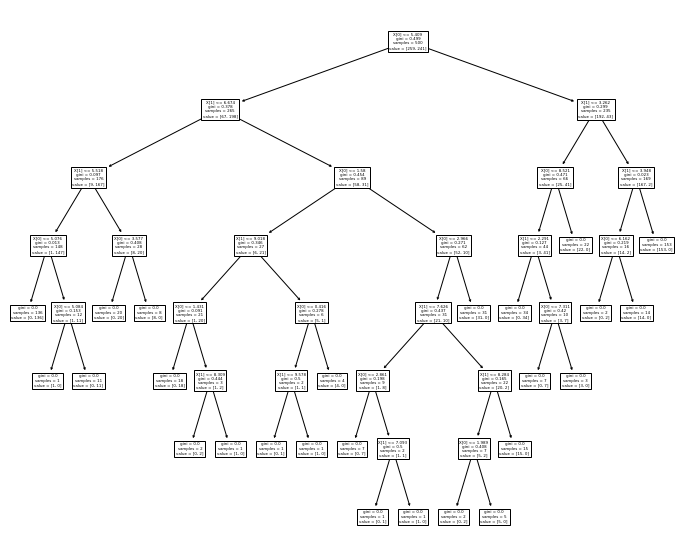

In [88]:
X = synth_df[['x0','x1']]
y = synth_df['label']
clf = DecisionTreeClassifier().fit(X,y)
fig, ax = plt.subplots(figsize=(12,10))
plot_tree(clf, ax=ax)

Decision trees can only take decision 'perpendicular' to axes (like x1<5), but since the line is not perpendicular, it cannot separate well.

[Text(0.5, 0.75, 'X[0] <= 10.033\ngini = 0.499\nsamples = 500\nvalue = [259, 241]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 241\nvalue = [0, 241]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 259\nvalue = [259, 0]')]

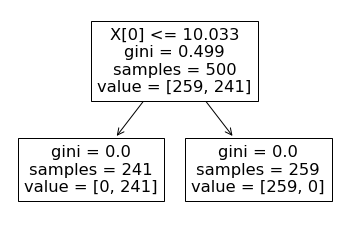

In [89]:
X_ = (X['x0'] + X['x1']).values.reshape(-1,1) #-1 to infer first dimension (number of rows)
clf_ = DecisionTreeClassifier().fit(X_, y)
fig,ax = plt.subplots()
plot_tree(clf_, ax=ax)

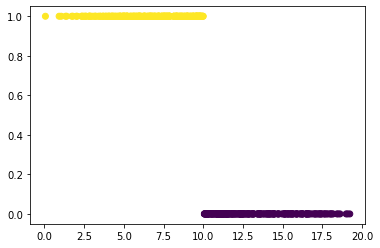

In [90]:
plt.scatter(X_, y, c=y)

[Text(0.5984848484848485, 0.9375, 'X[0] <= 5.409\ngini = 0.499\nsamples = 500\nvalue = [259, 241]'),
 Text(0.3181818181818182, 0.8125, 'X[1] <= 6.674\ngini = 0.378\nsamples = 265\nvalue = [67, 198]'),
 Text(0.12121212121212122, 0.6875, 'X[1] <= 5.518\ngini = 0.097\nsamples = 176\nvalue = [9, 167]'),
 Text(0.06060606060606061, 0.5625, 'X[0] <= 5.076\ngini = 0.013\nsamples = 148\nvalue = [1, 147]'),
 Text(0.030303030303030304, 0.4375, 'gini = 0.0\nsamples = 136\nvalue = [0, 136]'),
 Text(0.09090909090909091, 0.4375, 'X[1] <= 4.899\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.06060606060606061, 0.3125, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.12121212121212122, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.18181818181818182, 0.5625, 'X[0] <= 3.577\ngini = 0.408\nsamples = 28\nvalue = [8, 20]'),
 Text(0.15151515151515152, 0.4375, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.21212121212121213, 0.4375, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),

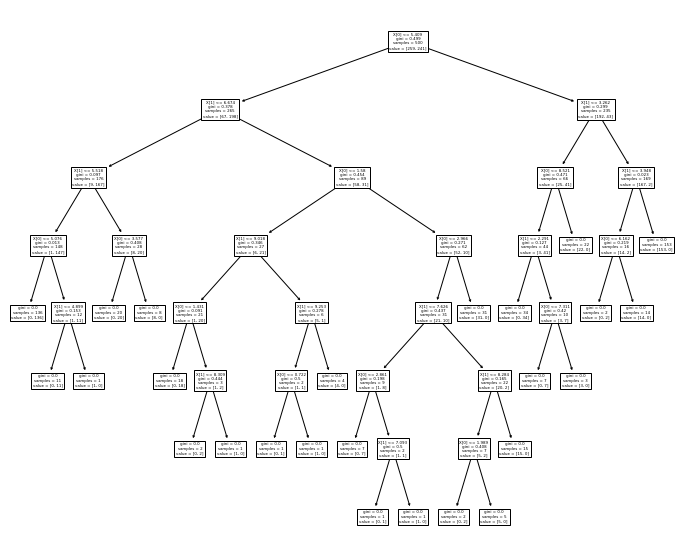

In [93]:
X = synth_df[['x0','x1']]
y = synth_df['label']
clf = DecisionTreeClassifier().fit(X,y)
fig, ax = plt.subplots(figsize=(12,10))
plot_tree(clf, ax=ax)

In [91]:
#  a list of the features used at each node. A value of -2 indicates a leaf node (where no split occurs)
clf.tree_.feature
# It is a depth first. We visit the tree one branch at a time, starting from left

array([ 0,  1,  1,  0, -2,  0, -2, -2,  0, -2, -2,  0,  1,  0, -2,  1, -2,
       -2,  0,  1, -2, -2, -2,  0,  1,  0, -2,  1, -2, -2,  1,  0, -2, -2,
       -2, -2,  1,  0,  1, -2,  0, -2, -2, -2,  1,  0, -2, -2, -2],
      dtype=int64)

In [92]:
clf.tree_.threshold # -2 no split since it is a leaf.

array([ 5.40876412,  6.6744628 ,  5.51829243,  5.07607341, -2.        ,
        5.08434319, -2.        , -2.        ,  3.57739341, -2.        ,
       -2.        ,  1.57965869,  9.01819515,  1.4306519 , -2.        ,
        8.30936813, -2.        , -2.        ,  0.41615283,  9.57837725,
       -2.        , -2.        , -2.        ,  2.96561909,  7.62585855,
        2.86126113, -2.        ,  7.09328413, -2.        , -2.        ,
        8.28434324,  1.98910064, -2.        , -2.        , -2.        ,
       -2.        ,  3.26193082,  8.52058029,  2.29148185, -2.        ,
        7.31053472, -2.        , -2.        , -2.        ,  3.94774652,
        6.16223955, -2.        , -2.        , -2.        ])

In [95]:
clf.tree_.feature.shape == clf.tree_.threshold.shape

True

In [ ]:
# 2.2.4 TODO: tesa

# 2.3 Random forest
Implement our version of a random forest

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid

X_train, X_test, y_train, y_test = train_test_split(X_mnist, y_mnist, test_size=1/7)

In [9]:
clf_mnist = DecisionTreeClassifier().fit(X_train, y_train)
pred = clf_mnist.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy

0.875

In [78]:
class MyRandomForestClassifier():
    
    def __init__(self, n_estimators, max_features, **kwargs):
        self.n_estimators = n_estimators
        self.max_features = max_features
        # collect trees used to estimate
        self.trees = []        
        self.random_state = kwargs['random_state']
        #print(self.random_state)
    
    # train the trees of this random forest using subsets of X (and y)
    def fit(self, X, y):
        np.random.seed(random_state)
        for _ in range(self.n_estimators):
            '''
            # randomly choose how many index we will use.
            # Don't know if set it in init and all trees use the same number of samples or not.
            N = np.random.randint(0, len(X))
            '''
            # They uses as size len(X)
            N = len(X)
            # choose N rows index to train the classifier (both X and y)
            choices = np.random.choice(X.index, size=N, replace=True)
            new_X = X.loc[choices]
            new_y = y.loc[choices]
            clf = DecisionTreeClassifier(max_features=self.max_features, random_state=self.random_state).fit(new_X, new_y)
            # once you have trained the tree, append it to the list of classifiers
            self.trees.append(clf)
            self.compute_feature_importances_()
        return self    
        
    # predict the label for each point in X
    def predict(self, X):
        # here we will save all predictions made by each tree in the forest
        preds = []
        for tree in self.trees:
            pred = tree.predict(X)
            preds.append(pred)
        # we create a matrix where we stack predictions of each tree vertically
        ary = np.vstack(preds)
        # we create a dataframe and we will exploit the value_counts() method to count the most voted label
        df = pd.DataFrame(ary, columns=list(range(ary.shape[-1])), index=list(range(ary.shape[0])))
        columns = df.columns
        # list containing final labels
        pred_labels = []
        for column in columns:
            most_voted_label = df[column].value_counts().index[0]
            pred_labels.append(most_voted_label)
        return pred_labels
    
    def compute_feature_importances_(self):
        stacked_features = np.stack([i.feature_importances_ for i in self.trees])
        num = np.sum(stacked_features, axis=0)
        den = np.sum(stacked_features, axis=0).sum()
        self.feature_importances_ = num / den
        
        

In [79]:
random_state = 0
cl = MyRandomForestClassifier(10,'sqrt', random_state=random_state).fit(X_train, y_train)
pred = cl.predict(X_test)
accuracy_score(y_test, pred)

0.9435

In [81]:
random_state = 0
param_grid = {'n_estimators': np.linspace(10, 100, 10, endpoint=True, dtype=int)}
clfs = []
for param in ParameterGrid(param_grid):
    clf = MyRandomForestClassifier(**param, max_features='sqrt', random_state=0).fit(X_train, y_train)
    pred = clf.predict(X_test)
    score = accuracy_score(y_test, pred)
    clfs.append((clf, score))
    print(param, score)

{'n_estimators': 10} 0.9435
{'n_estimators': 20} 0.9575
{'n_estimators': 30} 0.9597
{'n_estimators': 40} 0.9632
{'n_estimators': 50} 0.9641
{'n_estimators': 60} 0.9659
{'n_estimators': 70} 0.9655
{'n_estimators': 80} 0.9657
{'n_estimators': 90} 0.9654
{'n_estimators': 100} 0.9664


In [82]:
scores = [i[1] for i in clfs]
best_score_index = np.argmax(scores)
best_clf = clfs[best_score_index][0]

In [83]:
best_score_index, scores[best_score_index]

(9, 0.9664)

In [84]:
# 2.3.5 do 2.3.4 with random forest classifier of sklearn
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators': np.linspace(10, 100, 10, endpoint=True, dtype=int)}
clfs_rf_skl = []
for param in ParameterGrid(param_grid):
    clf = RandomForestClassifier(**param, max_features='sqrt').fit(X_train, y_train)
    pred = clf.predict(X_test)
    score = accuracy_score(y_test, pred)
    clfs_rf_skl.append((clf, score))
    print(param, score)


{'n_estimators': 10} 0.9488
{'n_estimators': 20} 0.9635
{'n_estimators': 30} 0.9629
{'n_estimators': 40} 0.9663
{'n_estimators': 50} 0.9682
{'n_estimators': 60} 0.9704
{'n_estimators': 70} 0.9707
{'n_estimators': 80} 0.9698
{'n_estimators': 90} 0.9719
{'n_estimators': 100} 0.9691


In [85]:
scores_rf_skl = [i[1] for i in clfs_rf_skl]
best_score_index_skl = np.argmax(scores_rf_skl)
best_clf_rf_skl = clfs_rf_skl[best_score_index_skl][0]

In [86]:
best_score_index_skl, scores_rf_skl[best_score_index_skl]

(8, 0.9719)

In [91]:
np.linalg.norm(best_clf_rf_skl.feature_importances_- best_clf.feature_importances_)

0.0514064810963975